In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Cost Function

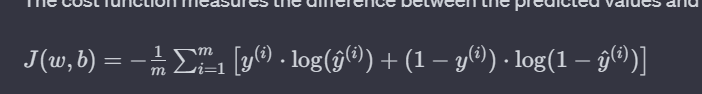


### Gradient Descent

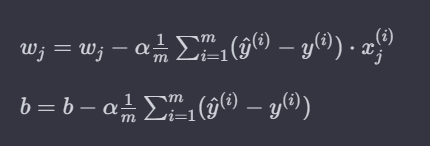

In [50]:
class LR:
    def __init__(self, learning_rate=0.01, num_iter=1000):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.w = None    # weights
        self.b = None    # bias

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, y, y_pred):
        m = len(y)
        epsilon = 1e-15  # Small epsilon to avoid taking the log of zero
        cost = -1/m * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
        return cost

    def fit(self, x, y):
        num_features = x.shape[1]
        self.w = np.zeros((num_features, 1))
        self.b = 0

        for i in range(1,self.num_iter+1):
            z = np.dot(x, self.w) + self.b  # Transpose self.w here
            y_pred = self.sigmoid(z)

            cost = self.cost(y, y_pred)

            dz = y_pred - y
            dw = np.mean(np.matmul(x.T,dz), axis=1, keepdims=True)
            db = np.mean(dz)

            self.w -= self.learning_rate * dw.reshape(-1,1)
            self.b -= self.learning_rate * db

            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {cost}")

    def predict(self, x):
        z = np.dot(x,self.w) + self.b
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)

In [51]:
model = LR(learning_rate=0.01,num_iter=100)
model.fit(x_train,y_train)

prediction = model.predict(x_test)

accuracy = np.mean(prediction == y_test)
print(f"Accuracy on test set: {accuracy*100}")

Iteration 100, Cost: 7080.449160956689
Accuracy on test set: 65.0
